# Import

In [2]:
pip install mglearn


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [49]:


%matplotlib inline
from IPython.display import display
import matplotlib_inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mglearn
from cycler import cycler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.metrics import *
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
import os

# Libreria per importare CSV da Drive
# from google.colab import drive

matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['image.cmap'] = "viridis"
plt.rcParams['image.interpolation'] = "none"
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.numpoints'] = 1
plt.rc('axes', prop_cycle=(
    cycler('color', mglearn.plot_helpers.cm_cycle.colors) +
    cycler('linestyle', ['-', '-', "--", (0, (3, 3)), (0, (1.5, 1.5))])))

np.set_printoptions(precision=3, suppress=True)

pd.set_option("display.max_columns", None)
pd.set_option('display.precision', 2)

__all__ = ['np', 'mglearn', 'display', 'plt', 'pd']

# Functions

In [50]:
def ohe(df, list_of_columns):
    # Inizializzare OneHotEncoder
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    
    # Manteniamo una copia del DataFrame originale
    df_encoded = df.copy()

    # Iterare sulle colonne da codificare
    for col in list_of_columns:
        # Applicare OneHotEncoder alla colonna specifica
        encoded = encoder.fit_transform(df[[col]])

        # Creare un DataFrame con le nuove colonne codificate, usando gli stessi indici del DataFrame originale
        encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out([col]), index=df.index)

        # Concatenare le nuove colonne codificate al DataFrame originale
        df_encoded = pd.concat([df_encoded, encoded_df], axis=1)
    df_encoded = df_encoded.drop(list_of_columns, axis=1)

    # Restituire il DataFrame finale, mantenendo le colonne originali
    return df_encoded

In [51]:
def train_and_test(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuratezza: {accuracy}')

    # Calcolare la precisione
    precision = precision_score(y_test, y_pred)
    print(f'Precisione: {precision}')

    # Calcolare il recall (sensibilità)
    recall = recall_score(y_test, y_pred)
    print(f'Recall: {recall}')

    # Calcolare FPR (False Positive Ration)
    print(f'FPR: {1 - recall}')

    # Matrice di confusione
    cm = confusion_matrix(y_test, y_pred)
    print(f'Matrice di confusione:\n{cm}')
    return model

In [52]:
def test(model, X_test, y_test):

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuratezza: {accuracy}')

    # Calcolare la precisione
    precision = precision_score(y_test, y_pred)
    print(f'Precisione: {precision}')

    # Calcolare il recall (sensibilità)
    recall = recall_score(y_test, y_pred)
    print(f'Recall: {recall}')

    # Calcolare FPR (False Positive Ration)
    print(f'FPR: {1 - recall}')

    # Matrice di confusione
    cm = confusion_matrix(y_test, y_pred)
    print(f'Matrice di confusione:\n{cm}')
    return 0

# Lettura Dataset

In [64]:
df = pd.read_csv("Base.csv")

df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.99,-1,25,40,6.74e-03,102.45,AA,1059,13096.04,7850.96,6742.08,5,5,CB,163,1,BC,0,1,9,0,1500.0,0,INTERNET,16.22,linux,1,1,0,0
1,0,0.8,0.62,-1,89,20,1.01e-02,-0.85,AD,1658,9223.28,5745.25,5941.66,3,18,CA,154,1,BC,1,1,2,0,1500.0,0,INTERNET,3.36,other,1,1,0,0
2,0,0.8,1.00,9,14,40,1.23e-02,-1.49,AB,1095,4471.47,5471.99,5992.56,15,11,CA,89,1,BC,0,1,30,0,200.0,0,INTERNET,22.73,windows,0,1,0,0
3,0,0.6,0.48,11,14,30,6.99e-03,-1.86,AB,3483,14431.99,6755.34,5970.34,11,13,CA,90,1,BC,0,1,1,0,200.0,0,INTERNET,15.22,linux,1,1,0,0
4,0,0.9,0.84,-1,29,40,5.74e+00,47.15,AA,2339,7601.51,5124.05,5940.73,1,6,CA,91,0,BC,1,1,26,0,200.0,0,INTERNET,3.74,other,0,1,0,0


In [32]:
df.shape

(1000000, 32)

In [31]:
df.nunique()

fraud_bool                               2
income                                   9
name_email_similarity               998861
prev_address_months_count              374
current_address_months_count           423
customer_age                             9
days_since_request                  989330
intended_balcon_amount              994971
payment_type                             5
zip_count_4w                          6306
velocity_6h                         998687
velocity_24h                        998940
velocity_4w                         998318
bank_branch_count_8w                  2326
date_of_birth_distinct_emails_4w        40
employment_status                        7
credit_risk_score                      551
email_is_free                            2
housing_status                           7
phone_home_valid                         2
phone_mobile_valid                       2
bank_months_count                       33
has_other_cards                          2
proposed_cr

In [48]:
print(df[(df['fraud_bool'] == 0)].shape[0])
print(df[(df['fraud_bool'] == 1)].shape[0])

988971
11029


In [66]:
numeric_features = [x for x in df.columns if df[x].nunique() >= 10]

print(numeric_features)

['name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'bank_months_count', 'proposed_credit_limit', 'session_length_in_minutes']


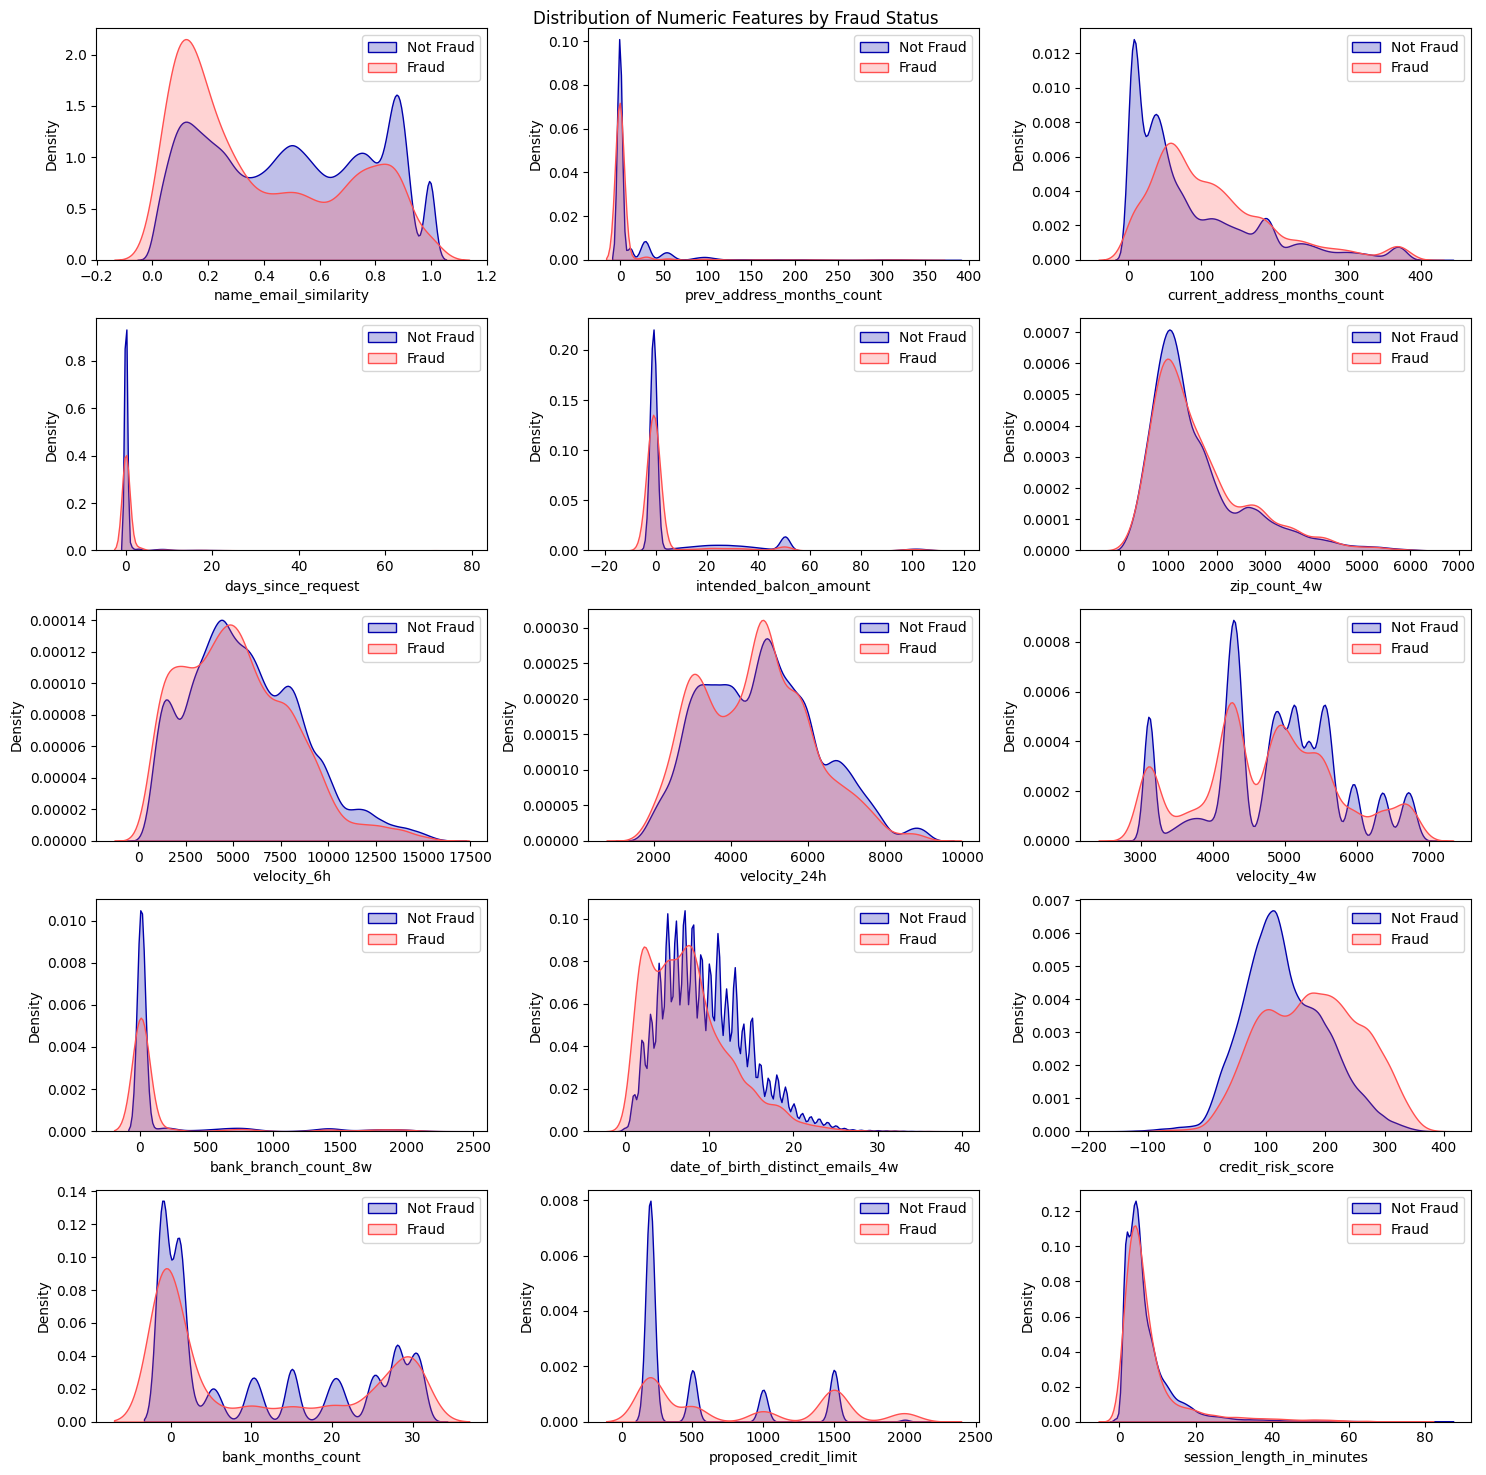

In [68]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))

# Add a title to the figure
fig.suptitle('Distribution of Numeric Features by Fraud Status')

# Loop through the numeric features and plot a kernel density plot for each feature
for i, feature in enumerate(numeric_features):
    ax = axes[i // 3][i % 3]
    sns.kdeplot(data=df[df['fraud_bool'] == 0][feature], fill=True, ax=ax, label='Not Fraud')
    sns.kdeplot(data=df[df['fraud_bool'] == 1][feature], fill=True, ax=ax, label='Fraud')
    ax.set_xlabel(feature)
    ax.legend()

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

In [69]:
categorical_features = [x for x in df.columns if df[x].dtypes == "O"]

print(categorical_features)

['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']


# OneHotEncoder

In [7]:
df = ohe(df,['employment_status','payment_type','housing_status', 'source', 'device_os'])

In [8]:
feature_cols = ['income', 'name_email_similarity',
'prev_address_months_count', 'current_address_months_count',
'customer_age', 'days_since_request', 'intended_balcon_amount',
'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w',
'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w',
'credit_risk_score', 'email_is_free', 'phone_home_valid',
'phone_mobile_valid', 'bank_months_count', 'has_other_cards',
'proposed_credit_limit', 'foreign_request', 'session_length_in_minutes',
'keep_alive_session', 'device_distinct_emails_8w', 'device_fraud_count',
'month', 'employment_status_CA', 'employment_status_CB',
'employment_status_CC', 'employment_status_CD', 'employment_status_CE',
'employment_status_CF', 'employment_status_CG', 'payment_type_AA',
'payment_type_AB', 'payment_type_AC', 'payment_type_AD',
'payment_type_AE', 'housing_status_BA', 'housing_status_BB',
'housing_status_BC', 'housing_status_BD', 'housing_status_BE',
'housing_status_BF', 'housing_status_BG', 'source_INTERNET',
'source_TELEAPP', 'device_os_linux', 'device_os_macintosh',
'device_os_other', 'device_os_windows', 'device_os_x11']

X = df[feature_cols] # Features
y = df['fraud_bool'] # Target variable

# Split train e test

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Train e test senza trasformazioni

In [11]:
model = RandomForestClassifier()
model = train_and_test(model, X_train, y_train)

Accuratezza: 0.989048
Precisione: 0.5
Recall: 0.002556610664718773
FPR: 0.9974433893352812
Matrice di confusione:
[[247255      7]
 [  2731      7]]


# Test sulle varianti

In [19]:
df_var1 = pd.read_csv("Variant I.csv")
df_var1 = ohe(df_var1,['employment_status','payment_type','housing_status', 'source', 'device_os'])

feature_cols = ['income', 'name_email_similarity',
'prev_address_months_count', 'current_address_months_count',
'customer_age', 'days_since_request', 'intended_balcon_amount',
'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w',
'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w',
'credit_risk_score', 'email_is_free', 'phone_home_valid',
'phone_mobile_valid', 'bank_months_count', 'has_other_cards',
'proposed_credit_limit', 'foreign_request', 'session_length_in_minutes',
'keep_alive_session', 'device_distinct_emails_8w', 'device_fraud_count',
'month', 'employment_status_CA', 'employment_status_CB',
'employment_status_CC', 'employment_status_CD', 'employment_status_CE',
'employment_status_CF', 'employment_status_CG', 'payment_type_AA',
'payment_type_AB', 'payment_type_AC', 'payment_type_AD',
'payment_type_AE', 'housing_status_BA', 'housing_status_BB',
'housing_status_BC', 'housing_status_BD', 'housing_status_BE',
'housing_status_BF', 'housing_status_BG', 'source_INTERNET',
'source_TELEAPP', 'device_os_linux', 'device_os_macintosh',
'device_os_other', 'device_os_windows', 'device_os_x11']

X = df_var1[feature_cols] # Features
y = df_var1['fraud_bool'] # Target variable

test(model, X, y)

Accuratezza: 0.990593
Precisione: 0.998769987699877
Recall: 0.14724816393145343
FPR: 0.8527518360685465
Matrice di confusione:
[[988969      2]
 [  9405   1624]]


0

# Plot distribution

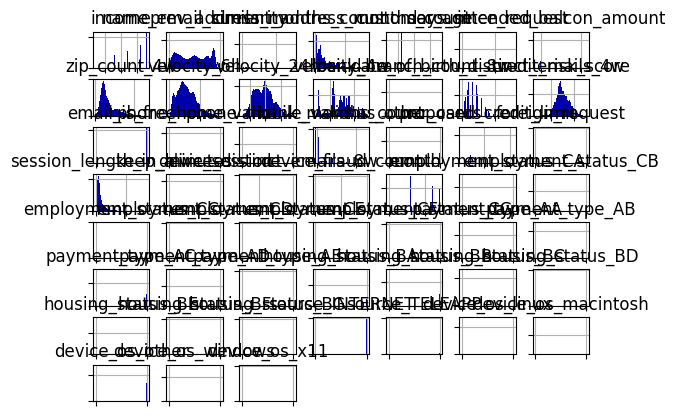

In [20]:
from pandas import read_csv
from matplotlib import pyplot

# drop the target variable
df = df.drop(['fraud_bool'], axis=1)

# create a histogram plot of each numeric variable
ax = df.hist(bins=100)

# disable axis labels to avoid the clutter
for axis in ax.flatten():
	axis.set_xticklabels([])
	axis.set_yticklabels([])
# show the plot
pyplot.show()

# Train e test con rapporto frodi non frodi 1 a 50

In [6]:
df_frodi = df[(df['fraud_bool'] == 1)]
n = df[(df['fraud_bool'] == 1)].shape[0]
df_not_frodi = df[(df['fraud_bool'] != 1)].head(n*50)

df_rapp = pd.concat([df_frodi, df_not_frodi])


X = df_rapp[feature_cols] # Features
y = df_rapp['fraud_bool'] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model = RandomForestClassifier()
model = train_and_test(model, X, y)


NameError: name 'df' is not defined

In [ ]:
X = df_var1[feature_cols] # Features
y = df_var1['fraud_bool'] # Target variable

test(model, X, y)

# Test e train con nan

In [12]:
df = pd.read_csv("Base.csv")

feature_cols = ['income', 'name_email_similarity',
'prev_address_months_count', 'current_address_months_count',
'customer_age', 'days_since_request', 'intended_balcon_amount',
'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w',
'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w',
'credit_risk_score', 'email_is_free', 'phone_home_valid',
'phone_mobile_valid', 'bank_months_count', 'has_other_cards',
'proposed_credit_limit', 'foreign_request', 'session_length_in_minutes',
'keep_alive_session', 'device_distinct_emails_8w', 'device_fraud_count',
'month', 'employment_status_CA', 'employment_status_CB',
'employment_status_CC', 'employment_status_CD', 'employment_status_CE',
'employment_status_CF', 'employment_status_CG', 'payment_type_AA',
'payment_type_AB', 'payment_type_AC', 'payment_type_AD',
'payment_type_AE', 'housing_status_BA', 'housing_status_BB',
'housing_status_BC', 'housing_status_BD', 'housing_status_BE',
'housing_status_BF', 'housing_status_BG', 'source_INTERNET',
'source_TELEAPP', 'device_os_linux', 'device_os_macintosh',
'device_os_other', 'device_os_windows', 'device_os_x11']


df_frodi = df[(df['fraud_bool'] == 1)]
n = df[(df['fraud_bool'] == 1)].shape[0]
df_not_frodi = df[(df['fraud_bool'] != 1)].head(n*50)

df_rapp = pd.concat([df_frodi, df_not_frodi])

columns_with_minus_one = ['prev_address_months_count', 'current_address_months_count', 'bank_months_count', 'session_length_in_minutes']
print(columns_with_minus_one)


# Count columns with specific value
def count_col(df,column_names,val):
    if isinstance(column_names, str):
        # If a single column name is provided, convert it to a list
        column_names = [column_names]
    for column_name in column_names:
        selected_rows = df[df[column_name] == val]
        print(column_name, ': ',selected_rows.shape[0])

# Replace specific value
def replace_col(df,column_names,initial,final):
    # Replace the specific value with another value
    replacement_value = final
    if isinstance(column_names, str):
        # If a single column name is provided, convert it to a list
        column_names = [column_names]
    for column_name in column_names:
        df.loc[df[column_name] == initial, column_name] = replacement_value

    return df

count_col(df_rapp,columns_with_minus_one,-1)
df_con_nan = replace_col(df_rapp,columns_with_minus_one,-1,np.nan)


['prev_address_months_count', 'current_address_months_count', 'bank_months_count', 'session_length_in_minutes']
prev_address_months_count :  389151
current_address_months_count :  2354
bank_months_count :  141588
session_length_in_minutes :  1019


In [13]:

X = df_var1[feature_cols] # Features
y = df_var1['fraud_bool'] # Target variable

test(model, X, y)

NameError: name 'df_var1' is not defined

### Eliminazione righe con troppi null

In [20]:
print(df_con_nan.shape)
df_not_null = df_con_nan.dropna(thresh=31)
print(df_not_null.shape)


(562479, 32)
(474186, 32)


In [22]:
df_ohe = ohe(df_not_null,['employment_status','payment_type','housing_status', 'source', 'device_os'])

print(df_ohe.shape)

df_ohe.fillna(df_ohe.mean(), inplace=True)

print(df_ohe.shape)

(474186, 53)
(474186, 53)


In [ ]:

X = df_ohe[feature_cols] # Features
y = df_ohe['fraud_bool'] # Target variable

print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


model = RandomForestClassifier()
model = train_and_test(model, X_train, y_train, X_test, y_test)

(474186, 52)
(474186,)
(355639, 52)
(355639,)
(118547, 52)
(118547,)
Accuratezza: 0.9903666900048083
Precisione: 0.9902097902097902
Recall: 0.38415626695604993
FPR: 0.6158437330439501
Matrice di confusione:
[[116697      7]
 [  1135    708]]


In [27]:
model = RandomForestClassifier(class_weight='balanced', random_state=42, verbose=1)
model = train_and_test(model, X_train, y_train, X_test, y_test)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   33.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s


Accuratezza: 0.9901389322378465
Precisione: 0.9759887005649718
Recall: 0.37493217580032556
FPR: 0.6250678241996744
Matrice di confusione:
[[116687     17]
 [  1152    691]]


In [ ]:
X = df_var1[feature_cols] # Features
y = df_var1['fraud_bool'] # Target variable

test(model, X, y)

# Test generici

### Generale, solo con ohe e split 25/75

In [ ]:
df = pd.read_csv("Base.csv")

df.shape

df = ohe(df,['employment_status','payment_type','housing_status', 'source', 'device_os'])

X_train, X_test, y_train, y_test = train_test_split(df.drop(['fraud_bool'], axis=1), df['fraud_bool'], random_state=0)

model = RandomForestClassifier()
model = train_and_test(model, X_train, y_train, X_test, y_test)

Accuratezza: 0.989048
Precisione: 0.5
Recall: 0.0014609203798392988
FPR: 0.9985390796201608
Matrice di confusione:
[[247258      4]
 [  2734      4]]


In [30]:
df = pd.read_csv("Base.csv")

df_frodi = df[(df['fraud_bool'] == 1)]
n = df[(df['fraud_bool'] == 1)].shape[0]
df_not_frodi = df[(df['fraud_bool'] != 1)].head(n*50)

df_rapp = pd.concat([df_frodi, df_not_frodi])

df.shape

df_rapp = ohe(df_rapp,['employment_status','payment_type','housing_status', 'source', 'device_os'])

X_train, X_test, y_train, y_test = train_test_split(df_rapp.drop(['fraud_bool'], axis=1), df_rapp['fraud_bool'], random_state=0)

model = RandomForestClassifier()
model = train_and_test(model, X_train, y_train, X_test, y_test)

Accuratezza: 0.988316029014365
Precisione: 0.9867139061116031
Recall: 0.4062727935813275
FPR: 0.5937272064186725
Matrice di confusione:
[[137863     15]
 [  1628   1114]]


In [43]:
df = pd.read_csv("Base.csv")

df_frodi = df[(df['fraud_bool'] == 1)]
n = df[(df['fraud_bool'] == 1)].shape[0]
df_not_frodi = df[(df['fraud_bool'] != 1)].head(n*25)

df_rapp = pd.concat([df_frodi, df_not_frodi])

df.shape

df_rapp = ohe(df_rapp,['employment_status','payment_type','housing_status', 'source', 'device_os'])

X_train, X_test, y_train, y_test = train_test_split(df_rapp.drop(['fraud_bool'], axis=1), df_rapp['fraud_bool'], random_state=0)

model = RandomForestClassifier()
model = train_and_test(model, X_train, y_train, X_test, y_test)

Accuratezza: 0.986050858569655
Precisione: 1.0
Recall: 0.6366279069767442
FPR: 0.3633720930232558
Matrice di confusione:
[[68937     0]
 [ 1000  1752]]


### Gradient Boosting

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

df = pd.read_csv("Base.csv")

df = ohe(df,['employment_status','payment_type','housing_status', 'source', 'device_os'])

X_train, X_test, y_train, y_test = train_test_split(df.drop(['fraud_bool'], axis=1), df['fraud_bool'], random_state=0)

model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
model = train_and_test(model, X_train, y_train, X_test, y_test)

Accuratezza: 0.989124
Precisione: 0.5508021390374331
Recall: 0.03761869978086194
FPR: 0.962381300219138
Matrice di confusione:
[[247178     84]
 [  2635    103]]


### PCA Random Forest https://www.geeksforgeeks.org/principal-component-analysis-pca/

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv("Base.csv")

df = ohe(df,['employment_status','payment_type','housing_status', 'source', 'device_os'])

X = df.drop(['fraud_bool'], axis=1)
y = df['fraud_bool']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Vengono normalizzati tutti i campi sottraendo la media e dividendo per la deviazione standard
# Step del ML per fare in modo che tutte le feature utilizzano la stessa scala

sc = StandardScaler()
print(X_train)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train)


        income  name_email_similarity  prev_address_months_count  \
760648     0.1                   0.19                         -1   
79333      0.9                   0.24                         -1   
771344     0.8                   0.20                         -1   
179102     0.6                   0.90                         -1   
75318      0.6                   0.52                         28   
...        ...                    ...                        ...   
963395     0.7                   0.62                         -1   
117952     0.4                   0.79                         -1   
435829     0.7                   0.41                         -1   
305711     0.4                   0.59                         -1   
985772     0.9                   0.07                         -1   

        current_address_months_count  customer_age  days_since_request  \
760648                            54            20            2.28e-02   
79333                             4

In [ ]:
# PCA con una componente per feature

from sklearn.decomposition import PCA


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

        income  name_email_similarity  prev_address_months_count  \
760648     0.1                   0.19                         -1   
79333      0.9                   0.24                         -1   
771344     0.8                   0.20                         -1   
179102     0.6                   0.90                         -1   
75318      0.6                   0.52                         28   
...        ...                    ...                        ...   
963395     0.7                   0.62                         -1   
117952     0.4                   0.79                         -1   
435829     0.7                   0.41                         -1   
305711     0.4                   0.59                         -1   
985772     0.9                   0.07                         -1   

        current_address_months_count  customer_age  days_since_request  \
760648                            54            20            2.28e-02   
79333                             4

In [ ]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.064, 0.049, 0.048, 0.042, 0.041, 0.037, 0.034, 0.03 , 0.028,
       0.028, 0.024, 0.023, 0.023, 0.022, 0.022, 0.021, 0.02 , 0.02 ,
       0.02 , 0.02 , 0.02 , 0.02 , 0.02 , 0.02 , 0.019, 0.019, 0.019,
       0.018, 0.018, 0.018, 0.018, 0.017, 0.017, 0.017, 0.016, 0.015,
       0.014, 0.013, 0.013, 0.011, 0.011, 0.01 , 0.009, 0.007, 0.006,
       0.003, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ])

Train con 52 componenti

In [90]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
train_and_test(classifier, X_train, y_train, X_test, y_test)

Accuratezza: 0.989005
Precisione: 0.0
Recall: 0.0
FPR: 1.0
Matrice di confusione:
[[197801      0]
 [  2199      0]]


c:\Users\Andrea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


RandomForestClassifier(max_depth=2, random_state=0)

Dato che non ci sono delle componenti strettamente più importanti di altre, utilizziamo le prime 16

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components=16)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [86]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
train_and_test(classifier, X_train, y_train, X_test, y_test)

Accuratezza: 0.989005
Precisione: 0.0
Recall: 0.0
FPR: 1.0
Matrice di confusione:
[[197801      0]
 [  2199      0]]


c:\Users\Andrea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


RandomForestClassifier(max_depth=2, random_state=0)

Test con 1 componenti

In [ ]:
df = pd.read_csv("Base.csv")

df = ohe(df,['employment_status','payment_type','housing_status', 'source', 'device_os'])

df_frodi = df[(df['fraud_bool'] == 1)]
n = df[(df['fraud_bool'] == 1)].shape[0]
df_not_frodi = df[(df['fraud_bool'] != 1)].head(n*25)

df_rapp = pd.concat([df_frodi, df_not_frodi])

X = df_rapp.drop(['fraud_bool'], axis=1)
y = df_rapp['fraud_bool']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

classifier = RandomForestClassifier()
train_and_test(classifier, X_train, y_train, X_test, y_test)

Accuratezza: 0.9751147316882646
Precisione: 0.8151041666666666
Recall: 0.45494186046511625
FPR: 0.5450581395348837
Matrice di confusione:
[[68653   284]
 [ 1500  1252]]


RandomForestClassifier()

Test con 2 componenti

In [100]:
df = pd.read_csv("Base.csv")

df = ohe(df,['employment_status','payment_type','housing_status', 'source', 'device_os'])

df_frodi = df[(df['fraud_bool'] == 1)]
n = df[(df['fraud_bool'] == 1)].shape[0]
df_not_frodi = df[(df['fraud_bool'] != 1)].head(n*25)

df_rapp = pd.concat([df_frodi, df_not_frodi])

X = df_rapp.drop(['fraud_bool'], axis=1)
y = df_rapp['fraud_bool']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

classifier = RandomForestClassifier()
train_and_test(classifier, X_train, y_train, X_test, y_test)

Accuratezza: 0.975212375678277
Precisione: 0.8163530175210902
Recall: 0.4571220930232558
FPR: 0.5428779069767442
Matrice di confusione:
[[68654   283]
 [ 1494  1258]]


RandomForestClassifier()

Test con 3 componenti

In [101]:
df = pd.read_csv("Base.csv")

df = ohe(df,['employment_status','payment_type','housing_status', 'source', 'device_os'])

df_frodi = df[(df['fraud_bool'] == 1)]
n = df[(df['fraud_bool'] == 1)].shape[0]
df_not_frodi = df[(df['fraud_bool'] != 1)].head(n*25)

df_rapp = pd.concat([df_frodi, df_not_frodi])

X = df_rapp.drop(['fraud_bool'], axis=1)
y = df_rapp['fraud_bool']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

classifier = RandomForestClassifier()
train_and_test(classifier, X_train, y_train, X_test, y_test)


Accuratezza: 0.9752263248197074
Precisione: 0.8128205128205128
Recall: 0.46075581395348836
FPR: 0.5392441860465116
Matrice di confusione:
[[68645   292]
 [ 1484  1268]]


RandomForestClassifier()

Test con 16 componenti

In [103]:
df = pd.read_csv("Base.csv")

df = ohe(df,['employment_status','payment_type','housing_status', 'source', 'device_os'])

df_frodi = df[(df['fraud_bool'] == 1)]
n = df[(df['fraud_bool'] == 1)].shape[0]
df_not_frodi = df[(df['fraud_bool'] != 1)].head(n*25)

df_rapp = pd.concat([df_frodi, df_not_frodi])

X = df_rapp.drop(['fraud_bool'], axis=1)
y = df_rapp['fraud_bool']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components=16)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

classifier = RandomForestClassifier()
model = train_and_test(classifier, X_train, y_train, X_test, y_test)

Accuratezza: 0.9805967442703901
Precisione: 0.9342693044033185
Recall: 0.5319767441860465
FPR: 0.46802325581395354
Matrice di confusione:
[[68834   103]
 [ 1288  1464]]


Test con 16 componenti (Robust Scaler)

In [12]:
df = pd.read_csv("Base.csv")

df = ohe(df,['employment_status','payment_type','housing_status', 'source', 'device_os'])

df_frodi = df[(df['fraud_bool'] == 1)]
n = df[(df['fraud_bool'] == 1)].shape[0]
df_not_frodi = df[(df['fraud_bool'] != 1)].head(n*25)

df_rapp = pd.concat([df_frodi, df_not_frodi])

X = df_rapp.drop(['fraud_bool'], axis=1)
y = df_rapp['fraud_bool']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

sc = RobustScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components=16)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

classifier = RandomForestClassifier()
model = train_and_test(classifier, X_train, y_train, X_test, y_test)

Accuratezza: 0.9851860118009736
Precisione: 0.9850746268656716
Recall: 0.623546511627907
FPR: 0.376453488372093
Matrice di confusione:
[[68911    26]
 [ 1036  1716]]


In [53]:
df = pd.read_csv("Base.csv")

df = ohe(df,['employment_status','payment_type','housing_status', 'source', 'device_os'])

df_frodi = df[(df['fraud_bool'] == 1)]
n = df[(df['fraud_bool'] == 1)].shape[0]
df_not_frodi = df[(df['fraud_bool'] != 1)].head(n*25)

df_rapp = pd.concat([df_frodi, df_not_frodi])

X = df_rapp.drop(['fraud_bool'], axis=1)
y = df_rapp['fraud_bool']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

sc = RobustScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components=10)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

classifier = RandomForestClassifier()
model = train_and_test(classifier, X_train, y_train, X_test, y_test)

Accuratezza: 0.9845861987194688
Precisione: 0.9697661152310325
Recall: 0.6177325581395349
FPR: 0.38226744186046513
Matrice di confusione:
[[68884    53]
 [ 1052  1700]]


Test senza training

In [46]:


from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler



df = pd.read_csv("Base.csv")



ct = ColumnTransformer(
    [("scaling", StandardScaler(), df.drop(['employment_status', 'payment_type', 'housing_status', 'source', 'device_os', 'fraud_bool'], axis=1).columns),
     ("onehot", OneHotEncoder(sparse_output=False), ['employment_status','payment_type','housing_status', 'source', 'device_os'])])


# get all columns apart from income for the features
data_features = df.drop("fraud_bool", axis=1)
# split dataframe and income
X_train, X_test, y_train, y_test = train_test_split(
    data_features, df.fraud_bool, random_state=0)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)
print(X_train_trans.shape)


X_test_trans = ct.transform(X_test)

classifier = RandomForestClassifier()
model = train_and_test(classifier, X_train_trans, y_train, X_test_trans, y_test)


(750000, 52)
Accuratezza: 0.989052
Precisione: 0.5454545454545454
Recall: 0.002191380569758948
FPR: 0.997808619430241
Matrice di confusione:
[[247257      5]
 [  2732      6]]


In [ ]:
ct.named_transformers_.onehot

Test Variant I

In [25]:
df_var1 = pd.read_csv("Variant I.csv")

df_var1 = ohe(df_var1,['employment_status','payment_type','housing_status', 'source', 'device_os'])

X = df_var1.drop(['fraud_bool'], axis=1)
y = df_var1['fraud_bool']


X_test = sc.transform(X)

X_test = pca.transform(X_test)

test(model, X_test , y)

Accuratezza: 0.419386
Precisione: 0.013536942615320232
Recall: 0.718560159579291
FPR: 0.281439840420709
Matrice di confusione:
[[411461 577510]
 [  3104   7925]]


0

Test Variant II

In [ ]:
df_var1 = pd.read_csv("Variant II.csv")

df_var1 = ohe(df_var1,['employment_status','payment_type','housing_status', 'source', 'device_os'])

X = df_var1.drop(['fraud_bool'], axis=1)
y = df_var1['fraud_bool']


X_test = sc.transform(X)

pca = PCA(n_components=16)
X_test = pca.transform(X_test)

test(model, X_test , y)

NotFittedError: This RobustScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

Test Variant III

In [113]:
df_var1 = pd.read_csv("Variant III.csv")

df_var1 = ohe(df_var1,['employment_status','payment_type','housing_status', 'source', 'device_os'])

df_frodi = df_var1[(df_var1['fraud_bool'] == 1)]
n = df_var1[(df_var1['fraud_bool'] == 1)].shape[0]
df_not_frodi = df_var1[(df_var1['fraud_bool'] != 1)].head(n*25)

df_rapp = pd.concat([df_frodi, df_not_frodi])

X = df_rapp.drop(['fraud_bool'], axis=1)
y = df_rapp['fraud_bool']


sc = StandardScaler()
X_test = sc.fit_transform(X)

pca = PCA(n_components=16)
X_test = pca.fit_transform(X_test)

test(model, X_test , y)

Accuratezza: 0.9725364390822233
Precisione: 0.7642426273458445
Recall: 0.41350861287398005
FPR: 0.58649138712602
Matrice di confusione:
[[274343   1407]
 [  6469   4561]]


0

Test Variant IV

In [114]:
df_var1 = pd.read_csv("Variant IV.csv")

df_var1 = ohe(df_var1,['employment_status','payment_type','housing_status', 'source', 'device_os'])

df_frodi = df_var1[(df_var1['fraud_bool'] == 1)]
n = df_var1[(df_var1['fraud_bool'] == 1)].shape[0]
df_not_frodi = df_var1[(df_var1['fraud_bool'] != 1)].head(n*25)

df_rapp = pd.concat([df_frodi, df_not_frodi])

X = df_rapp.drop(['fraud_bool'], axis=1)
y = df_rapp['fraud_bool']


sc = StandardScaler()
X_test = sc.fit_transform(X)

pca = PCA(n_components=16)
X_test = pca.fit_transform(X_test)

test(model, X_test , y)

Accuratezza: 0.9742171699560639
Precisione: 0.8223404255319149
Recall: 0.42048957388939256
FPR: 0.5795104261106074
Matrice di confusione:
[[274748   1002]
 [  6392   4638]]


0

Test Variant V

In [115]:
df_var1 = pd.read_csv("Variant V.csv")

df_var1 = ohe(df_var1,['employment_status','payment_type','housing_status', 'source', 'device_os'])

df_frodi = df_var1[(df_var1['fraud_bool'] == 1)]
n = df_var1[(df_var1['fraud_bool'] == 1)].shape[0]
df_not_frodi = df_var1[(df_var1['fraud_bool'] != 1)].head(n*25)

df_rapp = pd.concat([df_frodi, df_not_frodi])

X = df_rapp.drop(['fraud_bool'], axis=1)
y = df_rapp['fraud_bool']


sc = StandardScaler()
X_test = sc.fit_transform(X)

pca = PCA(n_components=16)
X_test = pca.fit_transform(X_test)

test(model, X_test , y)

Accuratezza: 0.9738893925657298
Precisione: 0.802115319003753
Recall: 0.42629193109700814
FPR: 0.5737080689029919
Matrice di confusione:
[[274590   1160]
 [  6328   4702]]


0

Test con PCA senza diminuzione frodi andato male.
Test PCA con diminuzione frodi andato bene(anche su Varianti)

### Rimozione device_fraud_count e month

In [79]:
df = pd.read_csv("Base.csv")

df_frodi = df[(df['fraud_bool'] == 1)]
n = df[(df['fraud_bool'] == 1)].shape[0]
df_not_frodi = df[(df['fraud_bool'] != 1)].head(n*50)

df_rapp = pd.concat([df_frodi, df_not_frodi])

df.shape

df_rapp = ohe(df_rapp,['employment_status','payment_type','housing_status', 'source', 'device_os'])

X = df_rapp.drop(['fraud_bool'], axis=1)
y = df_rapp['fraud_bool']

X_train, X_test, y_train, y_test = train_test_split(X.drop(['device_fraud_count', 'month'], axis=1), y, random_state=0)

model = RandomForestClassifier()
model = train_and_test(model, X_train, y_train, X_test, y_test)

Accuratezza: 0.982897169677144
Precisione: 0.8297455968688845
Recall: 0.15463165572574764
FPR: 0.8453683442742523
Matrice di confusione:
[[137791     87]
 [  2318    424]]


In [78]:
df_var1 = pd.read_csv("Variant I.csv")

df_var1 = ohe(df_var1,['employment_status','payment_type','housing_status', 'source', 'device_os'])

X = df_var1.drop(['fraud_bool', 'device_fraud_count', 'month'], axis=1)
y = df_var1['fraud_bool']

test(model, X , y)

Accuratezza: 0.978854
Precisione: 0.17004761594155632
Recall: 0.2363768247347901
FPR: 0.7636231752652098
Matrice di confusione:
[[976247  12724]
 [  8422   2607]]


0

### K Fold Cross Validation https://www.geeksforgeeks.org/cross-validation-using-k-fold-with-scikit-learn/

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold


df = pd.read_csv("Base.csv")

df = ohe(df,['employment_status','payment_type','housing_status', 'source', 'device_os'])

X = df.drop(['fraud_bool'], axis=1)
y = df['fraud_bool']

# Scaling the data
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

# K-Fold split
cnt = 0
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X_scaler, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, \
    Test set:{len(test_index)}')

    print(train_index)
    print(test_index)

    cnt += 1



Fold:0, Train set: 900000,     Test set:100000
Fold:1, Train set: 900000,     Test set:100000
Fold:2, Train set: 900000,     Test set:100000
Fold:3, Train set: 900000,     Test set:100000
Fold:4, Train set: 900000,     Test set:100000
Fold:5, Train set: 900000,     Test set:100000
Fold:6, Train set: 900000,     Test set:100000
Fold:7, Train set: 900000,     Test set:100000
Fold:8, Train set: 900000,     Test set:100000
Fold:9, Train set: 900000,     Test set:100000


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components=16)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

classifier = RandomForestClassifier()
train_and_test(classifier, X_train, y_train, X_test, y_test)